<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Homework # 3



---

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [2]:
# A:
x_list = [1,2,3,4,5,6,7,8,9,10]
y_list = [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]
dict = {}
dict['X'] = x_list
dict['Y'] = y_list
print(dict)

{'X': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Y': [0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}


### Using that dictionary, create a pandas DataFrame and call it pre_df

In [3]:
# A:Pass dictionary in Dataframe constructor to create a new object
# keys will be the column names and lists in values will be column data
pre_df = pd.DataFrame(dict)
pre_df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [4]:
# A:create two series directly from the pre_df dataframe
W = pd.Series(pre_df.X + 10)
Z = pd.Series(pre_df.Y + 3)
print(W)
print(Z)
# creating new dataframe from zipping the two series together
new_data = pd.DataFrame(zip(W,Z), columns=['X', 'Y'])
print(new_data)

0    11
1    12
2    13
3    14
4    15
5    16
6    17
7    18
8    19
9    20
Name: X, dtype: int64
0    3.50
1    3.70
2    3.80
3    3.99
4    4.00
5    4.40
6    4.80
7    5.10
8    5.40
9    5.90
Name: Y, dtype: float64
    X     Y
0  11  3.50
1  12  3.70
2  13  3.80
3  14  3.99
4  15  4.00
5  16  4.40
6  17  4.80
7  18  5.10
8  19  5.40
9  20  5.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [5]:
# A:
df = pd.concat([pre_df, new_data], axis=0).reset_index(drop=True)
print(df)

     X     Y
0    1  0.50
1    2  0.70
2    3  0.80
3    4  0.99
4    5  1.00
5    6  1.40
6    7  1.80
7    8  2.10
8    9  2.40
9   10  2.90
10  11  3.50
11  12  3.70
12  13  3.80
13  14  3.99
14  15  4.00
15  16  4.40
16  17  4.80
17  18  5.10
18  19  5.40
19  20  5.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

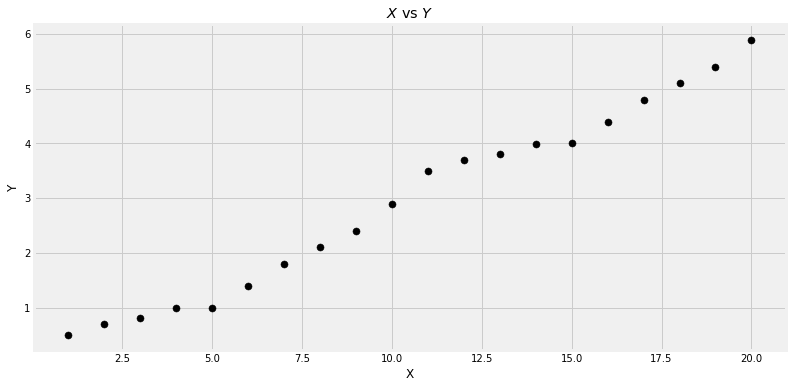

In [6]:
# A:
df.plot.scatter(x='X', y='Y', figsize=(12,6), color='black', s=50);
plt.title('$X$ vs $Y$');

### Using statsmodels, fit an OLS regression to your data and print our the summary

Documentation here: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html

Looking at a summary: https://www.statsmodels.org/dev/example_formulas.html

In [7]:
# A:
import statsmodels.api as sm
mod = sm.OLS(df['Y'], df['X'])
est = mod.fit()
print(est.params)
print(est.summary())

X    0.2837
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              5315.
Date:                Thu, 14 May 2020   Prob (F-statistic):                    9.96e-25
Time:                        12:16:04   Log-Likelihood:                          3.4938
No. Observations:                  20   AIC:                                     -4.988
Df Residuals:                      19   BIC:                                     -3.992
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [8]:
# add intercept to the model
X1 = sm.add_constant(df['X'])
mod = sm.OLS(df['Y'], X1)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1271.
Date:                Thu, 14 May 2020   Prob (F-statistic):           3.76e-18
Time:                        12:16:07   Log-Likelihood:                 3.9145
No. Observations:                  20   AIC:                            -3.829
Df Residuals:                      18   BIC:                            -1.838
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0857      0.097     -0.880      0.3

## Using the model you fitted, answer the following questions:

### What is the R-squared for the model?

In [68]:
# A: 0.986

### What is the p-value for your X?

In [69]:
# A: 3.76e-18

### What is the intercept?

In [70]:
# A: -0.0857

### Using the above, write the equation for our model

In [71]:
# A: y = 0.29 * x - 0.0857

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [72]:
# A: 
y = 0.29*20-0.0857
y

5.7143

In [73]:
# A:
y = 0.29*21-0.0857
y

6.0043

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [74]:
# A: Make sure that the new feature independent variable is in gthe same shape as X
#Xnew = np.row_stack((20, 21))
Xnew = np.vstack((20, 21))
print(Xnew)
Xnew = sm.add_constant(Xnew)
Ynewpred = est.predict(Xnew)
print(Ynewpred)

[[20]
 [21]]
[5.71371429 6.00368421]


### Get the residuals by using the predictions for every X (y_hats) and the true y values

In [75]:
# A:
res = df['Y'] - est.predict(X1)
print(res)

0     0.295714
1     0.205744
2     0.015774
3    -0.084195
4    -0.364165
5    -0.254135
6    -0.144105
7    -0.134075
8    -0.124045
9     0.085985
10    0.396015
11    0.306045
12    0.116075
13    0.016105
14   -0.263865
15   -0.153835
16   -0.043805
17   -0.033774
18   -0.023744
19    0.186286
dtype: float64


### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

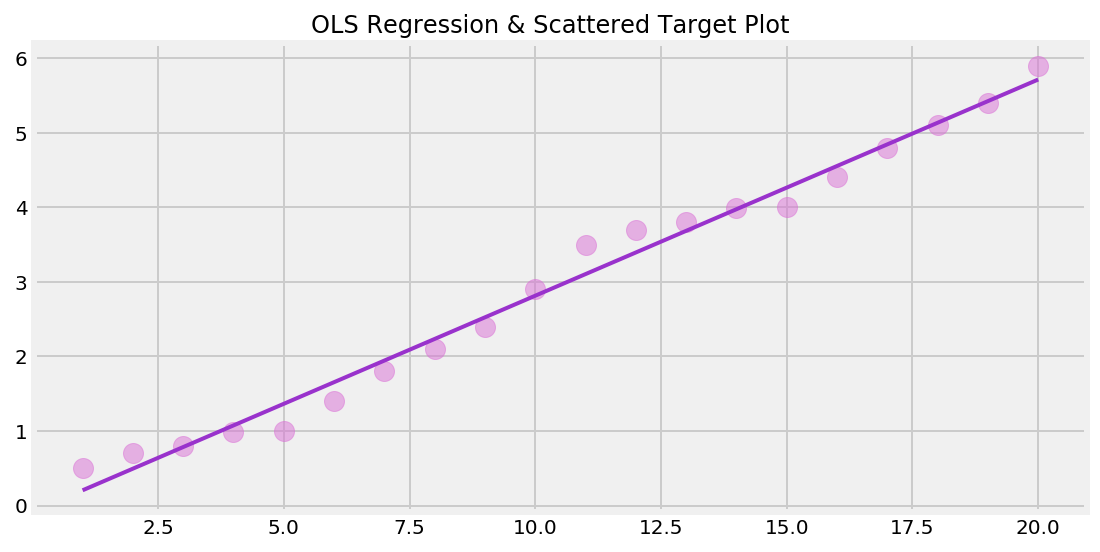

In [76]:
# A:
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df['X'], df['Y'], alpha=0.5, color='orchid', s=100)
ax.plot(df['X'], est.predict(X1), '-', color='darkorchid', linewidth=2)
fig.suptitle('OLS Regression & Scattered Target Plot')
fig.tight_layout(pad=2);
ax.grid(True)

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# web location:
local_csv = 'data/NHL_Data_GA.csv'

### 1. Load the NHL data

In [4]:
# A:
NHL = pd.read_csv(local_csv)
NHL.tail(20)

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
70,Minnesota12,81,3,2084:13:00,59,77,1.70,2.22,43.4,947,...,44.1,1729,2224,49.8,64.0,43.7,6.23,93.20,994,994
71,Carolina10,80,3,1827:01:00,65,82,2.13,2.69,44.2,899,...,47.6,1718,1869,56.4,61.4,47.9,7.23,91.72,990,1143
72,Tampa Bay10,80,3,1883:00:00,70,84,2.23,2.68,45.5,908,...,47.3,1626,1844,51.8,58.8,46.9,7.71,91.91,996,1318
73,Winnipeg11,80,3,2104:28:00,71,97,2.02,2.77,42.3,1152,...,49.3,2028,2157,57.8,61.5,48.5,6.16,91.73,979,926
74,Anaheim12,80,3,2101:50:00,83,96,2.37,2.74,46.4,1002,...,48.1,1915,2040,54.7,58.2,48.4,8.28,90.93,992,980
75,Toronto12,80,3,2005:54:00,85,90,2.54,2.69,48.6,958,...,46.9,1895,2060,56.7,61.6,47.9,8.87,91.51,1004,824
76,Colorado10,79,3,1965:17:00,91,83,2.78,2.53,52.3,943,...,46.5,1655,1965,50.5,60.0,45.7,9.65,92.39,1020,924
77,NY Islanders10,79,3,1914:22:00,83,77,2.60,2.41,51.9,1033,...,49.6,1922,2012,60.2,63.1,48.9,8.03,92.68,1007,859
78,NY Islanders12,79,3,2202:50:00,81,96,2.21,2.61,45.8,1125,...,49.4,2062,2237,56.2,60.9,48.0,7.20,91.35,986,763
79,Montreal12,78,3,1996:11:00,91,77,2.74,2.31,54.2,949,...,46.8,1829,2033,55.0,61.1,47.4,9.59,92.82,1024,954


### 2. Perform any required data cleaning. Do some EDA.

In [12]:
# A:
NHL.shape
NHL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    90 non-null     object 
 1   PTS     90 non-null     int64  
 2   Rank    90 non-null     int64  
 3   TOI     90 non-null     object 
 4   GF      90 non-null     int64  
 5   GA      90 non-null     int64  
 6   GF60    90 non-null     float64
 7   GA60    90 non-null     float64
 8   GF%     90 non-null     float64
 9   SF      90 non-null     int64  
 10  SA      90 non-null     int64  
 11  SF60    90 non-null     float64
 12  SA60    90 non-null     float64
 13  SF%     90 non-null     float64
 14  FF      90 non-null     int64  
 15  FA      90 non-null     int64  
 16  FF60    90 non-null     float64
 17  FA60    90 non-null     float64
 18  FF%     90 non-null     float64
 19  CF      90 non-null     int64  
 20  CA      90 non-null     int64  
 21  CF60    90 non-null     float64
 22  CA60

In [81]:
NHL.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


In [82]:
NHL.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

In [83]:
NHL.corr()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
PTS,1.000000,-0.905004,0.563947,-0.578796,0.481331,-0.587673,0.737442,0.451071,-0.309242,0.468253,...,0.581731,0.418394,-0.380098,0.424370,-0.512371,0.594891,0.268053,0.371560,0.471897,0.184277
Rank,-0.905004,1.000000,-0.475713,0.535782,-0.409616,0.536279,-0.653633,-0.446335,0.324561,-0.484563,...,-0.585340,-0.383993,0.423351,-0.403508,0.537879,-0.598466,-0.168314,-0.324691,-0.365246,-0.166454
GF,0.563947,-0.475713,1.000000,-0.184804,0.917060,-0.209936,0.786085,0.509486,-0.146905,0.600424,...,0.488946,0.484832,-0.154473,0.563931,-0.223546,0.496942,0.710729,0.077525,0.559824,0.086639
GA,-0.578796,0.535782,-0.184804,1.000000,-0.172348,0.913963,-0.747626,-0.163174,0.292250,-0.183025,...,-0.327387,-0.176083,0.324147,-0.199016,0.364852,-0.361101,-0.084262,-0.803892,-0.667311,-0.221524
GF60,0.481331,-0.409616,0.917060,-0.172348,1.000000,-0.036936,0.717642,0.238760,-0.322020,0.557568,...,0.378446,0.215688,-0.315416,0.524451,-0.108661,0.396471,0.834732,-0.039807,0.557026,0.145071
GA60,-0.587673,0.536279,-0.209936,0.913963,-0.036936,1.000000,-0.716356,-0.402233,0.082260,-0.187607,...,-0.391974,-0.410373,0.126895,-0.196336,0.441831,-0.410968,0.078053,-0.846578,-0.586792,-0.146274
GF%,0.737442,-0.653633,0.786085,-0.747626,0.717642,-0.716356,1.000000,0.455568,-0.276276,0.522118,...,0.539240,0.446368,-0.300658,0.506348,-0.381984,0.564523,0.523071,0.557864,0.790703,0.191861
SF,0.451071,-0.446335,0.509486,-0.163174,0.238760,-0.402233,0.455568,1.000000,0.087814,0.806430,...,0.752718,0.917001,0.001137,0.697279,-0.441653,0.729746,-0.237978,0.204636,-0.011583,0.059932
SA,-0.309242,0.324561,-0.146905,0.292250,-0.322020,0.082260,-0.276276,0.087814,1.000000,-0.222046,...,-0.543669,0.127545,0.872390,-0.173436,0.604242,-0.506534,-0.228749,0.329090,0.087117,-0.068410
SF60,0.468253,-0.484563,0.600424,-0.183025,0.557568,-0.187607,0.522118,0.806430,-0.222046,1.000000,...,0.788091,0.705617,-0.304612,0.868984,-0.352053,0.778101,0.012254,0.033347,0.032741,0.185565


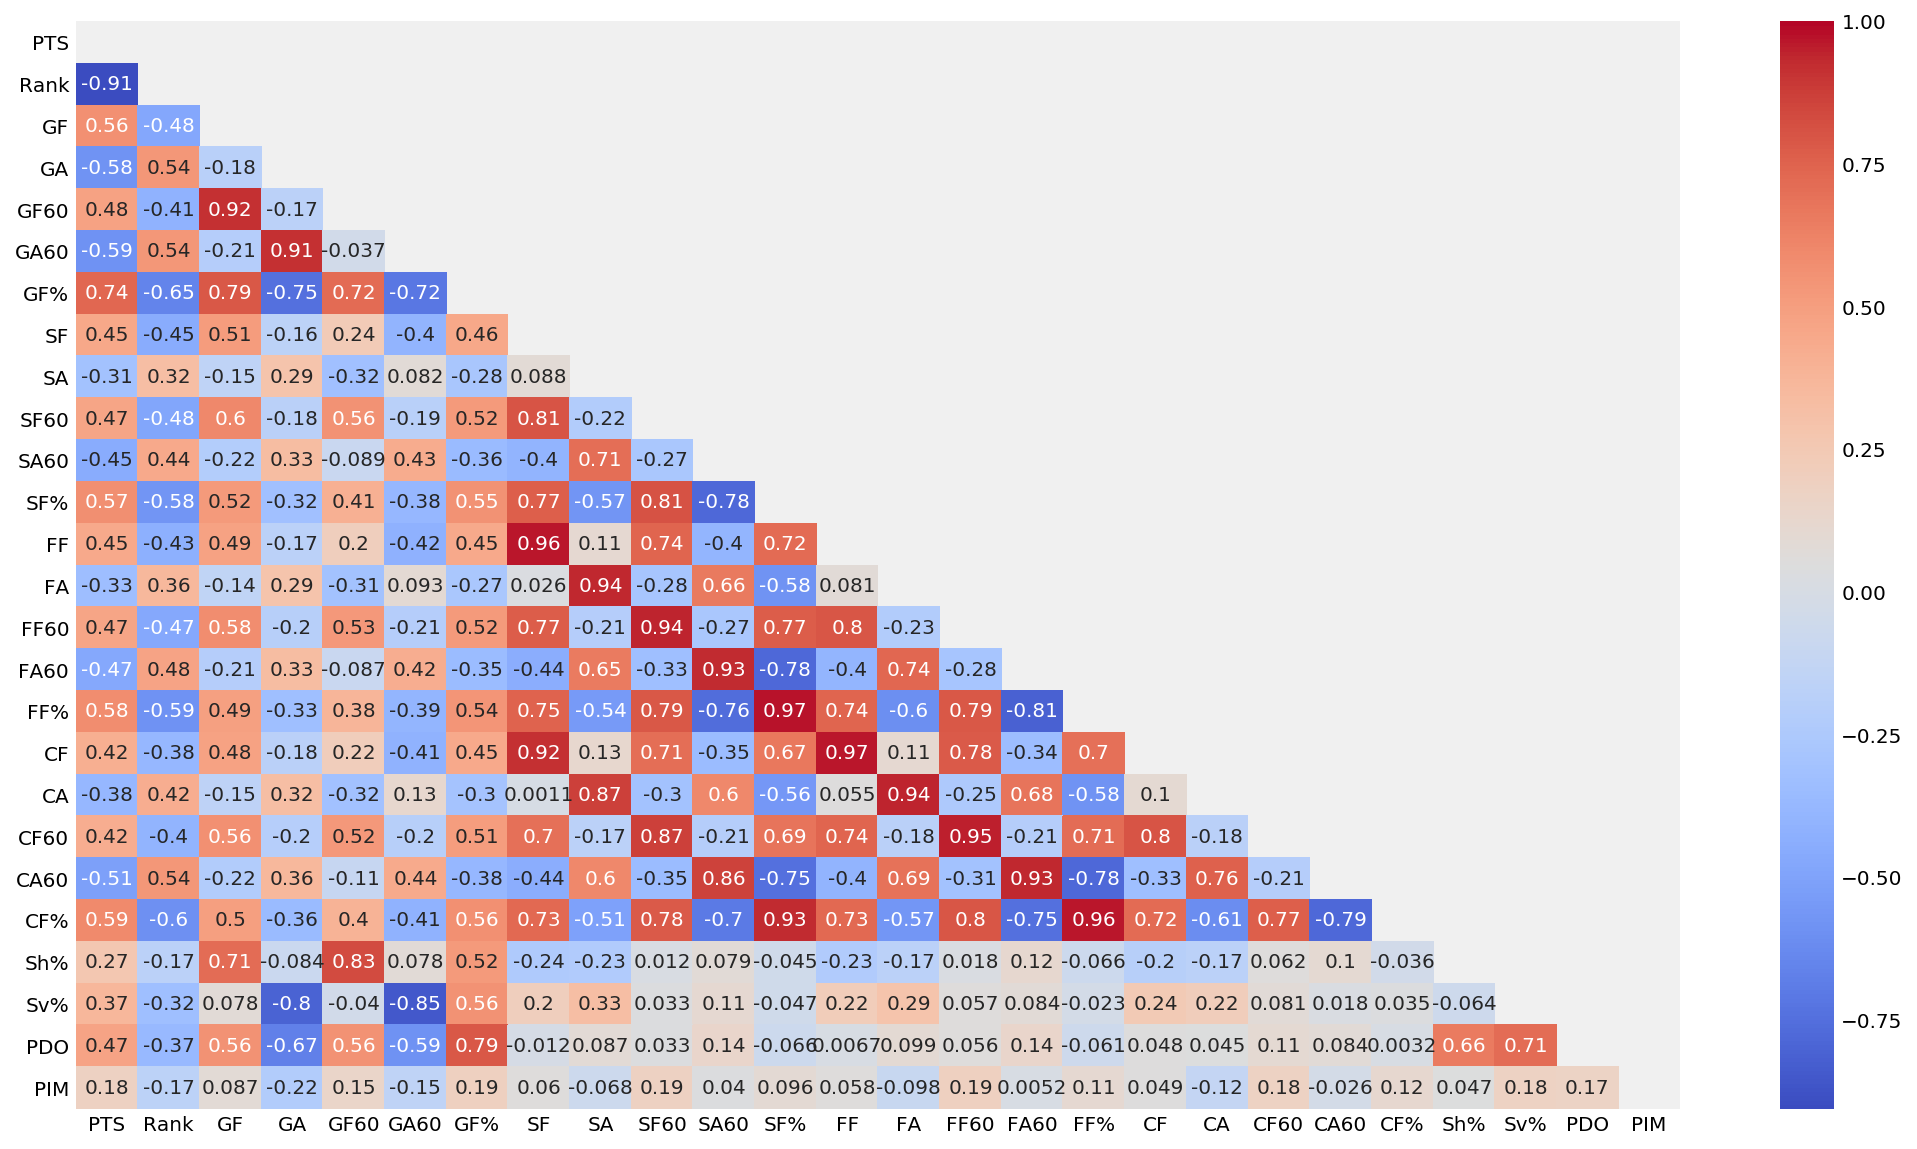

In [84]:
mask = np.zeros_like(NHL.corr());
triangle_indices = np.triu_indices_from(mask);
mask[triangle_indices]= True
plt.figure(figsize=(16, 10));
sns.heatmap(NHL.corr(), mask=mask, annot=True, cmap='coolwarm', annot_kws={'size': 10});

In [5]:
NHL.Rank.nunique()

3

In [6]:
NHL.Rank.unique()

array([1, 2, 3], dtype=int64)

In [85]:
# Find out the sorted list of highly correlated feature independent variables
abs(NHL.corr().Rank).sort_values()

PIM     0.166454
Sh%     0.168314
SA      0.324561
Sv%     0.324691
FA      0.364666
PDO     0.365246
CF      0.383993
CF60    0.403508
GF60    0.409616
CA      0.423351
FF      0.425059
SA60    0.443970
SF      0.446335
FF60    0.466239
GF      0.475713
FA60    0.477409
SF60    0.484563
GA      0.535782
GA60    0.536279
CA60    0.537879
SF%     0.577347
FF%     0.585340
CF%     0.598466
GF%     0.653633
PTS     0.905004
Rank    1.000000
Name: Rank, dtype: float64

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [12]:
# A: There are three classes 1,2,3 in the Rank column
y = NHL.Rank
NHL.Rank.value_counts().sort_index()

1    29
2    30
3    31
Name: Rank, dtype: int64

### 4. What is the baseline accuracy?

In [87]:
# A: Calculate baseline accuracy based on random prediction algorithm
from random import seed
from random import randrange
 
# Generate random predictions note that this allows for multi-column train test sets
def random_algorithm(train, test):
    output_values = [row[2] for row in train]
    unique = list(set(output_values))
    predicted = list()
    for row in test:
        index = randrange(len(unique))
        predicted.append(unique[index])
    return predicted
# Test it using NHL column train set, test set shape needs to be 2-d array 
seed(1)
train = np.array(NHL)
test = [[None]]*90
predictions = random_algorithm(train, test)
print(predictions)
# calculate the mean of predictions hit on the known targets of train set for baseline accuracy
print(100*np.mean(predictions == y))

[1, 3, 1, 2, 1, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 1, 2, 1, 1, 1, 3, 3, 1, 2, 3, 1, 2, 3, 1, 3, 1, 2, 2, 3, 1, 2, 1, 3, 1, 2, 2, 1, 2, 3, 3, 1, 1, 3, 3, 2, 1, 3, 2, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 3, 2, 3, 1, 2, 1, 3, 2, 2, 3, 1, 2, 3, 3, 3, 3, 2]
40.0


For this classification problems, the one rule is to predict the class value that is most common in the training dataset. This means that if a training dataset has 31 instances of class “3” and 30 instances of class “2” and 29 instances of class “1” that it will predict “3” and achieve a baseline accuracy of 31/90 or 34.4% accuracy. This is bases for Zero Rule Algorithm for classification which will be implemented below

In [88]:
# zero rule algorithm for classification to generate baseline accuracy for our NHL set
def zero_rule_algorithm_classification(train, test):
    output_values = [row[2] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(train))]
    return predicted
# Test it using NHL column train set, test set shape needs to be 2-d array 
seed(1)
train = np.array(NHL)
test = [[None]]*90
predictions = zero_rule_algorithm_classification(train, test)
print(predictions)
# calculate the mean of predictions hit on the known targets of train set for baseline accuracy
print(100*np.mean(predictions == y))

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
34.44444444444444


The above two method and example calculations for baseline accuracies of NHL predictions on Target "Rank" indicate that random prediction algorithm calculates higher baseline accuarcy of 40% where zero rule algorithm predicts 34.4%. This is due to the fact that the "Rank" class distribution is highly even (31 '3's, 30 '2's, and 29 '1's) 

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [10]:
# A: Pick the features with highest absolute correlations with Rank
X_col = ['PTS', 'GF%', 'CF%', 'FF%']
X = NHL[X_col]
X.head()

,PTS,GF%,CF%,FF%
0,121,61.2,52.5,51.3
1,117,56.6,53.4,53.1
2,113,57.0,51.4,50.9
3,112,55.6,57.1,58.1
4,111,53.8,52.6,51.0


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [16]:
# A:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)
sk_predictions = knn.predict(X)
# calculate the mean of predictions hit on the known targets
print(100*np.mean(sk_predictions == y))
from sklearn import metrics
y_pred_class = knn.predict(X)
print(metrics.accuracy_score(y, y_pred_class))

100.0
1.0


Notice that if n_neighbors = 90 which is the total data set length then the accuracy is 34.4% exactly the same as baseline accuracy based on zero rule algorithm

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [7]:
# A:Yes, this is better than baseline. No this is not legitimate Overfitting

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [17]:
# A:
from sklearn.model_selection import train_test_split
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.5, random_state=42) 
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train, y_train) 
# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9333333333333333
0.9333333333333333


The random split of the set into train and test reduced accuracy score for n_neighbors = 1 from 100% to 93.3%

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [18]:
# A:
knn = KNeighborsClassifier(n_neighbors=len(X_train.index)) 
knn.fit(X_train, y_train) 
# Calculate the accuracy of the model 
print(knn.score(X_test, y_test)) 

0.3111111111111111


As we see here that as n_neighbors increase score drops and for the splitted test set the baseline score (n_neighbors=number of rows of training data) is even lower than the original NHL whole set before the train-test-split (31.1% vs. 34.4%)

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [19]:
# A: create a numpy range from 1 to number of train set rows and let accuracy scores follow the n_neighbors values
neighbors = np.arange(1, len(X_train.index)) 
# declare empty numpy array of the two accuracy lists
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
print(train_accuracy)
print(test_accuracy)

[1.         0.91111111 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.93333333 0.95555556 0.95555556 0.93333333
 0.93333333 0.93333333 0.95555556 0.93333333 0.93333333 0.91111111
 0.93333333 0.93333333 0.88888889 0.91111111 0.86666667 0.86666667
 0.84444444 0.82222222 0.66666667 0.6        0.6        0.57777778
 0.6        0.6        0.6        0.6        0.62222222 0.62222222
 0.62222222 0.64444444 0.66666667 0.66666667 0.64444444 0.66666667
 0.64444444 0.37777778]
[0.93333333 0.91111111 0.97777778 0.93333333 0.95555556 0.93333333
 0.91111111 0.88888889 0.91111111 0.88888889 0.88888889 0.86666667
 0.88888889 0.86666667 0.88888889 0.86666667 0.93333333 0.88888889
 0.93333333 0.93333333 0.91111111 0.91111111 0.91111111 0.91111111
 0.86666667 0.86666667 0.68888889 0.55555556 0.57777778 0.51111111
 0.55555556 0.53333333 0.53333333 0.53333333 0.55555556 0.57777778
 0.6        0.6        0.6        0.64444444 0.62222222 0.6
 0.6        0.31111111]


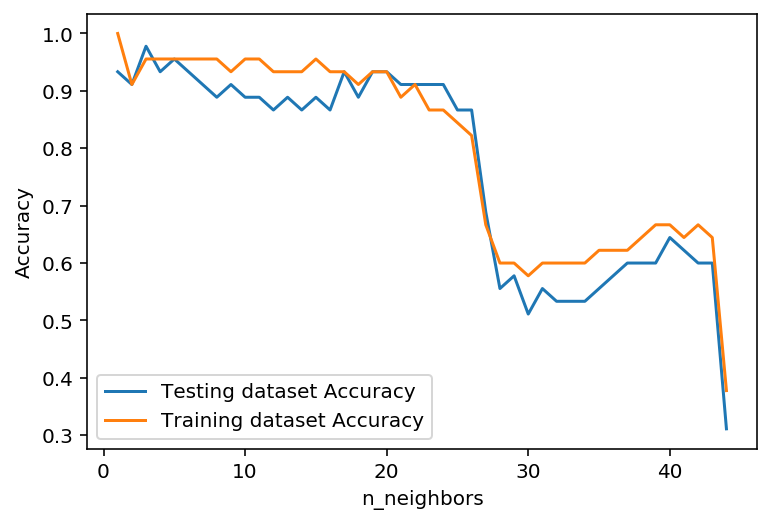

In [20]:
# Generate plot We see that the testing and training accuracies are pretty close over the span of K
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [22]:
# A:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# This mean squared error, not root squared error
# print(metrics.mean_squared_error(y, y_pred))

# 5 fold cross volidation training set is always 72 long
max_neighbors = np.floor(X.shape[0] - X.shape[0]/5.)
print(max_neighbors)
neighbors = np.arange(1, int(max_neighbors))
mse_values = np.empty(len(neighbors)) 
scores = np.empty(len(neighbors)) 
    
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # Compute traning and test data accuracy 
    mse_values[i] = np.mean(-cross_val_score(knn, X, y, cv=kf, scoring='neg_mean_squared_error')) 
    scores[i] = np.mean(cross_val_score(knn, X, y, cv=kf))     
print(mse_values)
print(scores)

72.0
[0.07777778 0.12222222 0.07777778 0.06666667 0.05555556 0.05555556
 0.07777778 0.1        0.08888889 0.08888889 0.08888889 0.08888889
 0.1        0.08888889 0.08888889 0.08888889 0.07777778 0.07777778
 0.08888889 0.1        0.12222222 0.12222222 0.12222222 0.1
 0.08888889 0.1        0.08888889 0.1        0.1        0.1
 0.11111111 0.11111111 0.14444444 0.14444444 0.13333333 0.14444444
 0.17777778 0.18888889 0.24444444 0.26666667 0.25555556 0.33333333
 0.38888889 0.38888889 0.42222222 0.43333333 0.5        0.51111111
 0.5        0.53333333 0.54444444 0.55555556 0.56666667 0.56666667
 0.56666667 0.56666667 0.56666667 0.57777778 0.57777778 0.6
 0.6        0.6        0.6        0.6        0.61111111 0.61111111
 0.62222222 0.93333333 0.95555556 1.26666667 1.54444444]
[0.92222222 0.87777778 0.92222222 0.93333333 0.94444444 0.94444444
 0.92222222 0.9        0.91111111 0.91111111 0.91111111 0.91111111
 0.9        0.91111111 0.91111111 0.91111111 0.92222222 0.92222222
 0.91111111 0.9      

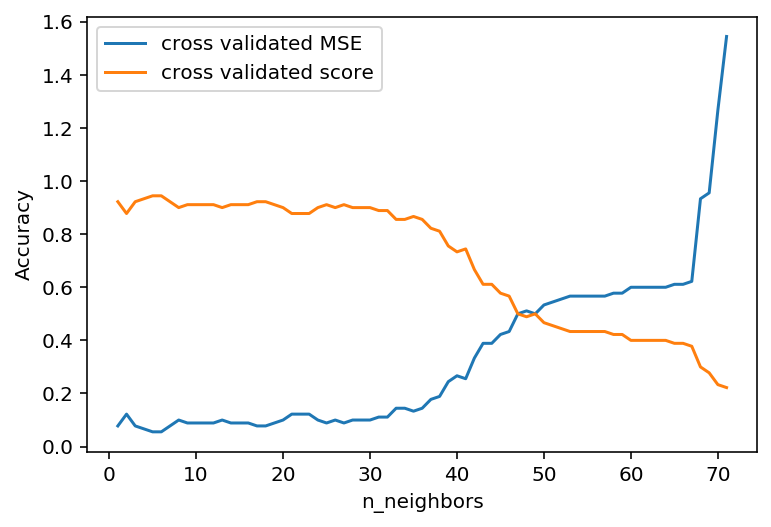

In [32]:
# Generate plot of mean cross validated accuracies, looks like best n_neighbors range is in (1, 10) where
# score are highest and MSE are lowest
plt.plot(neighbors, mse_values, label = 'cross validated MSE') 
plt.plot(neighbors, scores, label = 'cross validated score') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [27]:
# A:standardize the predictor matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
X_std[:5]

array([[2.33028962, 2.42902529, 0.89369165, 0.4792155 ],
       [2.00911647, 1.43306959, 1.21188516, 1.12615641],
       [1.68794332, 1.51967443, 0.50478847, 0.33545085],
       [1.60765003, 1.21655748, 2.52001403, 2.92321452],
       [1.52735675, 0.82683569, 0.92904648, 0.37139201]])

In [33]:
# A:assuming still 5 fold cross validation
# 5 fold cross volidation training set is always 72 long
# plot test accuracy by number of neighbors:
scores_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores_std.append(np.mean(cross_val_score(knn, X_std, y, cv=5)))

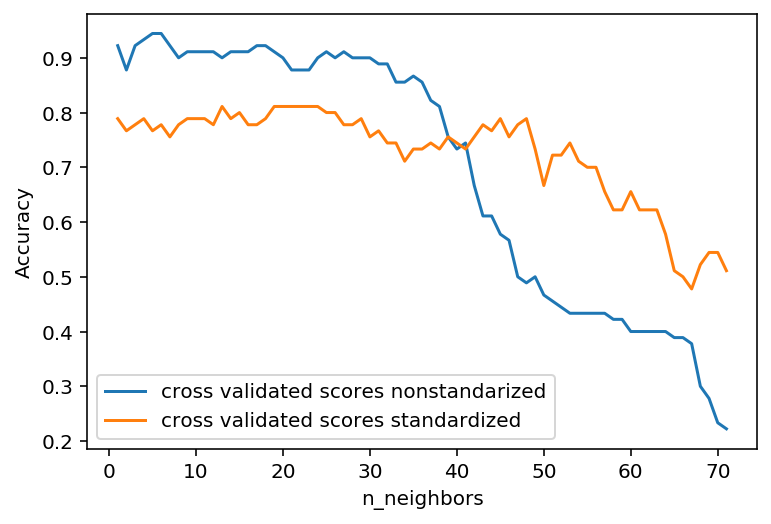

In [34]:
# Generate plot of mean cross validated scores 
plt.plot(neighbors, scores, label = 'cross validated scores nonstandarized') 
plt.plot(neighbors, scores_std, label = 'cross validated scores standardized') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

The mean scores for non-standardized are higher than the standardized mean scores when K value is less than 40. I think the reason maybe that the highly correlated variable feature PTS got higher weights when nonstandardized. The fit becomes not so good when this natural weight parameter is smoothed out by standardization. In this case, lower best accuracy when standardized could mean that this best accuracy around 80% is more realistic than the higher best accuarcy of around 90% when the scale of hghly correlated variable PTS plays a big role.